# Calculating Stock Returns using Pandas DataFrames

### 1. How can calculate the change in value of an investment for a given moment?

![Rate of Return](https://dm2302files.storage.live.com/y4mZVRh1wA1di_3t5Hq3ry37sZzhYlV1AfQwIeAfFoFQj2edXBACsxMILEeawfDPV6t1aEf_seRGZUAss4l7VrH2LYZpt0iNTIbTMxAzo3AyC3fhtVfUlIe_vVADMC2EQ60th7qxLlHEaASaRgAXV1EqyiobPGvNclsjvm4YAf23HDx0lOVrK8rbcWvnOWfqDmf?width=639&height=105&cropmode=none)

### 2. How can we calculate the performance of an investment?

![Return on Investment (ROI)](https://dm2302files.storage.live.com/y4mSdxQfoALpAiyTutsUO6YnkALD_YVt6EQTc-ru6LzUl3_xs-B3f7WM8EIBFKtM71LSxPPLZUx6_jEpHfcXzdHejKalvn_ZBrXEaTz3Zly2Mfz7MIuQ9Slzwis-hlA6VLFfEctv06_xbYoNStG7bakzruLsZ8uG006v6lUP2Hc19mgfNAnl1LYD-o69L_CKMa4?width=1008&height=61&cropmode=none)

    ** Gain from Investment - Amount of profit generated from the sale of the investment, or the increease in value of the investment regardles of whether it is sold or not. 

### 3. What are some costs that may be necessary to take into account when analyzing the ROI?

    ** Transaction, brokerage fee and connection fees to an exchange must be factored in if applicable. 



## 1. Import Libaries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
 # jupyter magic functions, draws the images only. A alternative could be %matplotlib notebook which will allow to get zoom-able & resize-able notebook. Very useful for quick test where you need to work interactively. 
%matplotlib inline 
# %matplotlib notebook

## 2. Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path('../Resources/MSFT.csv')

## 3. Read CSV in as DataFrame

In [3]:
# Read in the CSV as a DataFrame
msft_df = pd.read_csv(csv_path, index_col='date', parse_dates=True, infer_datetime_format=True)
msft_df_main = msft_df.copy()
msft_df.head()


,close,volume,open,high,low
date,,,,,
2009-08-03,23.83,46843710,23.82,23.86,23.50
2009-08-04,23.77,49116380,23.68,23.79,23.53
2009-08-05,23.81,53263040,23.84,24.25,23.79
2009-08-06,23.46,59655950,23.93,23.98,23.27
2009-08-07,23.56,46165010,23.75,23.82,23.50


## 4. Drop Extra Columns

In [4]:
# Drop unnecessary columns
msft_df.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)
msft_df.head()



,close
date,
2009-08-03,23.83
2009-08-04,23.77
2009-08-05,23.81
2009-08-06,23.46
2009-08-07,23.56


In [5]:
msft_df.tail()

,close
date,
2019-07-26,141.34
2019-07-29,141.03
2019-07-30,140.35
2019-07-31,136.27
2019-08-01,138.06


* Recall that the drop() method from Pandas does not alter the dataframe by default. We need to use the `inplace` parameter to alter the dataframe we are working on.

## 5. Plot Daily Close

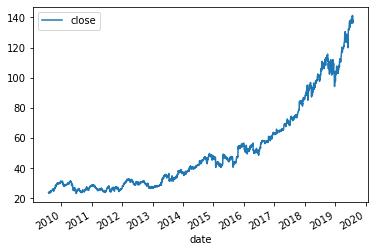

In [6]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
msft_df.plot()

## 6. Calculate Daily Returns

    ** Daily return is the metric that compares the rate of return for a stock compared to its value the previous day. Selecting the price of the stock is key and need to be consistent (avg, open, close, high, etc.). 

In [7]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = msft_df.pct_change()
display(daily_returns)



,close
date,
2009-08-03,NaN
2009-08-04,-0.002518
2009-08-05,0.001683
2009-08-06,-0.014700
2009-08-07,0.004263
...,...
2019-07-26,0.008203
2019-07-29,-0.002193
2019-07-30,-0.004822


In [12]:
msft_df_main[['close', 'open', 'high', 'low']].pct_change(axis=1)

,close,open,high,low
date,,,,
2009-08-03,NaN,-0.000420,0.001679,-0.015088
2009-08-04,NaN,-0.003786,0.004645,-0.010929
2009-08-05,NaN,0.001260,0.017198,-0.018969
2009-08-06,NaN,0.020034,0.002089,-0.029608
2009-08-07,NaN,0.008065,0.002947,-0.013434
...,...,...,...,...
2019-07-26,NaN,-0.006863,0.009297,-0.009705
2019-07-29,NaN,0.003333,0.000071,-0.015149
2019-07-30,NaN,-0.001496,0.007706,-0.010051


## 7. Plot Daily Returns

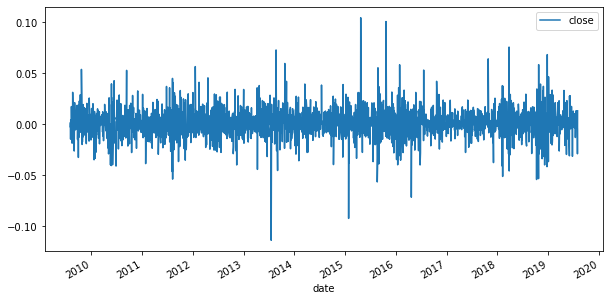

In [14]:
# Plot the daily returns of MSFT over the last 10 years
daily_returns.plot(figsize=(10,5))

## 8. Calculate Cumulative Returns

### What is cumulative returns?

![Cumulative Return at k-period](https://dm2302files.storage.live.com/y4m__UReHKxfegpRM2rnhlz5v_8R-l__6NGASvCHUQJ14rIa_k2-zpKVvbStFdXBXeAufWkGwYKbKRtL5aOuU2Y0sH0MF4dQIC9HmxyNwngBN0gdUvSnDfyQTIGdNH4-f5ceUD9ezulI4hYNHdHV-mSCpDxqzHOOBIqM9g6bYXptrNM20Tewp5NkBY2Hb2qNWBg?width=151&height=86&cropmode=none)

** It is the aggregated amount from all the daily returns, in other words, the total change in the investment price over a set of time. Pandas allows to calculate this by using `cumprod()` function. Keep in mind that cumulative returns of a security/asset does not have interest or dividens.  

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html)


In [15]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1+daily_returns).cumprod() - 1
cumulative_returns

,close
date,
2009-08-03,NaN
2009-08-04,-0.002518
2009-08-05,-0.000839
2009-08-06,-0.015527
2009-08-07,-0.011330
...,...
2019-07-26,4.931179
2019-07-29,4.918170
2019-07-30,4.889635


## 9. Plot Cumulative Returns

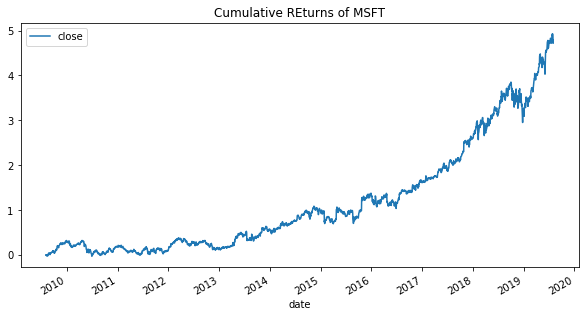

In [17]:
# Plot the daily returns of the MSFT over the last 10 years

cumulative_returns.plot(figsize=(10,5), title = "Cumulative REturns of MSFT")
